In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("drawndata1.csv")

In [4]:
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [25]:
X = df[['x', 'y']].values
y = df['z'] == 'a'

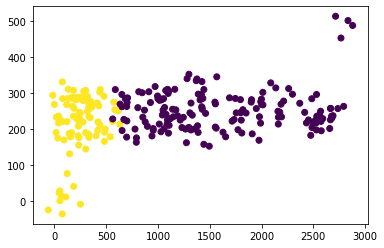

In [8]:
plt.scatter(X[:,0], X[:, 1], c=y)

# Standard Scaler
- mean, variance
```
[ x - mean(x) ] / sqrt( var )
```

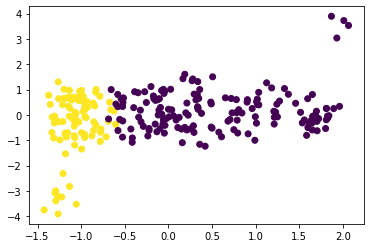

In [9]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c=y)

The example below shows how our scaled data is affected by outliers.

(array([ 90., 149., 143., 129., 113.,  73.,  46.,  52.,  41.,  26.,  28.,
         15.,  16.,  17.,   9.,   8.,  11.,   6.,   8.,   5.,   4.,   1.,
          2.,   1.,   4.,   0.,   2.,   0.,   0.,   1.]),
 array([-1.13847223, -0.92381379, -0.70915536, -0.49449692, -0.27983848,
        -0.06518005,  0.14947839,  0.36413683,  0.57879526,  0.7934537 ,
         1.00811214,  1.22277058,  1.43742901,  1.65208745,  1.86674589,
         2.08140432,  2.29606276,  2.5107212 ,  2.72537963,  2.94003807,
         3.15469651,  3.36935494,  3.58401338,  3.79867182,  4.01333026,
         4.22798869,  4.44264713,  4.65730557,  4.871964  ,  5.08662244,
         5.30128088]),
 <BarContainer object of 30 artists>)

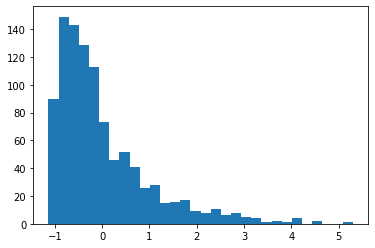

In [12]:
x = np.random.exponential(10, (1000)) + np.random.normal(0,1,(1000))
plt.hist((x-np.mean(x))/np.std(x), 30)

Here comes the boxplot, 5 number summary etc.

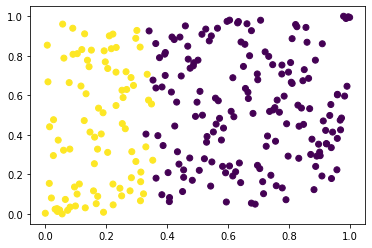

In [15]:
from sklearn.preprocessing import QuantileTransformer
X_quant = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_quant[:,0], X_quant[:,1], c=y)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
def plot_output(scaler):
    pipe = Pipeline([
        ('scale', scaler),
        ('model', KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])
    pred = pipe.fit(X,y).predict(X)
    plt.figure(figsize=(9,3))
    plt.subplot(131)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title('Original Data')
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:,0], X_tfm[:,1], c=y)
    plt.title('Transformed Data')
    plt.subplot(133)
    # generate random points
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)),
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:,0], X_new[:,1], c=y_proba[:,1], alpha=0.7)
    plt.title('Predicted Data')

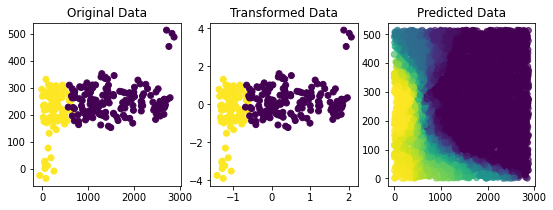

In [27]:
plot_output(StandardScaler())

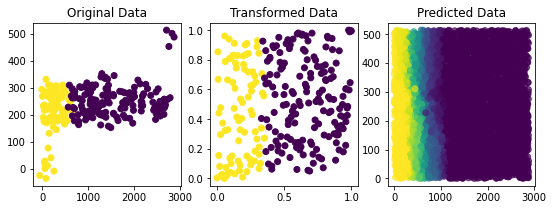

In [29]:
plot_output(QuantileTransformer(n_quantiles=100))

In [33]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsClassifier())
])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [35]:
grid = GridSearchCV(estimator=pipe, 
                    param_grid={
                        'scale': [StandardScaler(), QuantileTransformer(n_quantiles=100)],
                        'model__n_neighbors': list(range(1,11))
                    }
                   )

In [36]:
grid.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'scale': [StandardScaler(),
                                   QuantileTransformer(n_quantiles=100)]})

In [40]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,param_scale,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.004417,0.003705,0.006191,0.002664,6,QuantileTransformer(n_quantiles=100),"{'model__n_neighbors': 6, 'scale': QuantileTra...",0.862745,0.960784,0.98,0.98,0.98,0.952706,0.045592,1
15,0.004788,0.003909,0.003206,0.003926,8,QuantileTransformer(n_quantiles=100),"{'model__n_neighbors': 8, 'scale': QuantileTra...",0.823529,0.980392,0.98,0.96,0.98,0.944784,0.061127,2
19,0.000201,0.000402,0.007491,0.004098,10,QuantileTransformer(n_quantiles=100),"{'model__n_neighbors': 10, 'scale': QuantileTr...",0.843137,0.980392,0.98,0.94,0.98,0.944706,0.053110,3
13,0.001600,0.003200,0.006390,0.003195,7,QuantileTransformer(n_quantiles=100),"{'model__n_neighbors': 7, 'scale': QuantileTra...",0.784314,0.980392,0.98,0.98,0.98,0.940941,0.078314,4
3,0.003467,0.004267,0.006405,0.003202,2,QuantileTransformer(n_quantiles=100),"{'model__n_neighbors': 2, 'scale': QuantileTra...",0.843137,0.960784,0.98,0.94,0.98,0.940784,0.051012,5
1,0.002910,0.001250,0.004565,0.000934,1,QuantileTransformer(n_quantiles=100),"{'model__n_neighbors': 1, 'scale': QuantileTra...",0.725490,1.000000,0.98,1.00,0.98,0.937098,0.106181,6
17,0.004798,0.003918,0.004800,0.003919,9,QuantileTransformer(n_quantiles=100),"{'model__n_neighbors': 9, 'scale': QuantileTra...",0.725490,0.980392,1.00,0.98,0.98,0.933176,0.104128,7
6,0.004652,0.005164,0.010672,0.002759,4,StandardScaler(),"{'model__n_neighbors': 4, 'scale': StandardSca...",0.764706,0.980392,0.98,0.96,0.98,0.933020,0.084517,8
5,0.004000,0.003577,0.003538,0.003696,3,QuantileTransformer(n_quantiles=100),"{'model__n_neighbors': 3, 'scale': QuantileTra...",0.666667,0.980392,1.00,1.00,1.00,0.929412,0.131592,9
14,0.003200,0.003919,0.004806,0.003924,8,StandardScaler(),"{'model__n_neighbors': 8, 'scale': StandardSca...",0.725490,1.000000,0.98,0.96,0.98,0.929098,0.102587,10


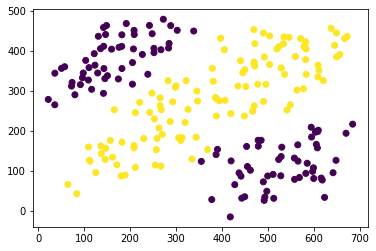

In [47]:
df = pd.read_csv("drawndata2.csv") # not linearly seperable
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:,0], X[:, 1], c=y)

In [58]:
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
pipe_logistic = Pipeline(steps = [
    ('scale', QuantileTransformer(n_quantiles=100)),
    ('logistic', LogisticRegression()), 
])
pipe_bayesian = make_pipeline(QuantileTransformer(n_quantiles=100), BayesianRidge())
pipe_neighbour = make_pipeline(QuantileTransformer(n_quantiles=100), KNeighborsRegressor())

In [64]:
def plot_predictions(model):
    preds = model.fit(X,y).predict(X)
    plt.scatter(X[:,0], X[:,1], c=preds)

Pipeline(steps=[('quantiletransformer', QuantileTransformer(n_quantiles=100)),
                ('bayesianridge', BayesianRidge())])

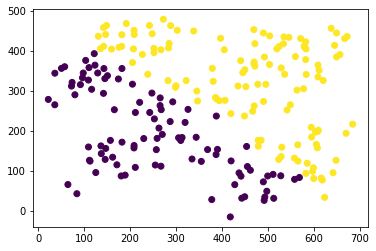

In [65]:
plot_predictions(pipe_logistic)

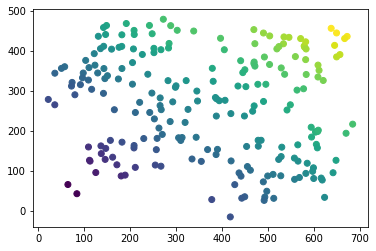

In [66]:
plot_predictions(pipe_bayesian)

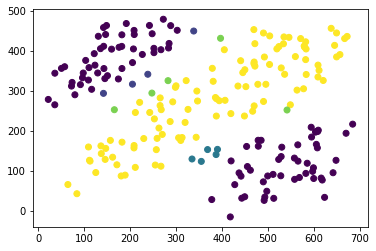

In [67]:
plot_predictions(pipe_neighbour)